In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from skimage import io

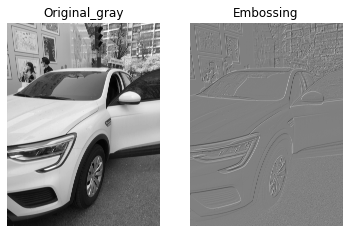

In [2]:
#embossing

img = cv2.imread('./whiteCar.jpg')

gray_img = np.float32(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

dst = np.array([[-1, -1, 0], [-1, 0, 1], [0, 1, 1]])

output = cv2.filter2D(gray_img, -1, dst) + 128

output[output > 255] = 255
output[output < 0] = 0
output = np.uint8(output)


plt.subplot(1,2,1)
plt.title('Original_gray')
plt.axis('off')
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Embossing')
plt.axis('off')
plt.imshow(output, cmap='gray')
plt.show()

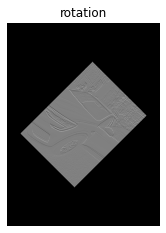

In [3]:
#이미지회전

height,width, channel = img.shape

matrix = cv2.getRotationMatrix2D((width / 2, height / 2),-45,0.5)
rot = cv2.warpAffine(output,matrix,(width,height))

plt.subplot(1,2,1)
plt.title('rotation')
plt.axis('off')
plt.imshow(rot, cmap='gray')
plt.show()

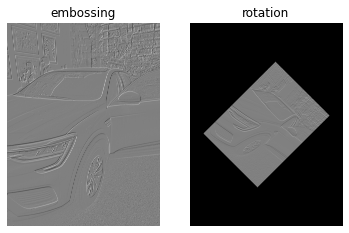

In [4]:
plt.subplot(1,2,1)
plt.title('embossing')
plt.axis('off')
plt.imshow(output, cmap='gray')

plt.subplot(1,2,2)
plt.title('rotation')
plt.axis('off')
plt.imshow(rot, cmap='gray')
plt.show()

In [5]:
#이미지 붙이기
embo = cv2.resize(output,(400,400))
rotation = cv2.resize(rot,(400,400))

dst = np.hstack((embo,rotation))
cv2.imshow('embossing',dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 블러링, 샤프닝은 colab에 작성함

In [8]:
img = cv2.imread('./whiteCar.jpg')
img = cv2.resize(img,(320,400)) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurring_mask1 = np.array([[1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9]])
blurring_mask2 = np.array([[1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25], [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
                           [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25], [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
                           [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25]])

smoothing_mask = np.array([[1 / 16, 1 / 8, 1 / 16], [1 / 8, 1 / 4, 1 / 8], [1 / 16, 1 / 8, 1 / 16]])

sharpening_mask1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpening_mask2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

blurring_out1 = cv2.filter2D(gray, -1, blurring_mask1)
blurring_out2 = cv2.filter2D(gray, -1, blurring_mask2)

smoothing_out = cv2.filter2D(gray, -1, smoothing_mask)

sharpening_out1 = cv2.filter2D(gray, -1, sharpening_mask1)
sharpening_out2 = cv2.filter2D(gray, -1, sharpening_mask2)

cv2.imshow("original", gray)
cv2.imshow('blurring(3X3)', blurring_out1)
cv2.imshow('blurring(5X5)', blurring_out2)

cv2.imshow('smoothing', smoothing_out)

cv2.imshow('sharpening1', sharpening_out1)
cv2.imshow('sharpening2', sharpening_out2)

cv2.waitKey(0)


-1